In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data_set=pd.read_csv('Fraud_check.csv')
data_set

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data_set.shape

(600, 6)

In [4]:
data_set.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
data_set.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
data_set.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
data_set['Undergrad']=le.fit_transform(data_set['Undergrad'])
data_set['Marital.Status']=le.fit_transform(data_set['Marital.Status'])
data_set['Urban']=le.fit_transform(data_set['Urban'])
data_set

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
data_set.insert(6,'tax_category','')
data_set

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,
1,1,0,33700,134075,18,1,
2,0,1,36925,160205,30,1,
3,1,2,50190,193264,15,1,
4,0,1,81002,27533,28,0,
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,
596,1,0,69967,55369,2,1,
597,0,0,47334,154058,0,1,
598,1,1,98592,180083,17,0,


In [10]:
import warnings
warnings.filterwarnings('ignore')

## Converting taxable income to category of 0 and 1

In [11]:
for i in range(0,len(data_set['Taxable.Income']),1):
    if data_set['Taxable.Income'][i]>=30000:
        data_set['tax_category'][i]='0'
    else:
        data_set['tax_category'][i]='1'
data_set

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [12]:
data_set['tax_category'].unique()

array(['0', '1'], dtype=object)

# Model building

In [13]:
x=data_set.loc[:,('Undergrad','Marital.Status','City.Population','Work.Experience','Urban')]
y=data_set['tax_category']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Model training

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier().fit(x_train,y_train)

# Model testing

In [16]:
y_pred_train=rf_model.predict(x_train)
y_pred_test=rf_model.predict(x_test)

# Model Evaluation

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [18]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        96
           1       0.17      0.04      0.07        24

    accuracy                           0.77       120
   macro avg       0.48      0.49      0.47       120
weighted avg       0.67      0.77      0.71       120



In [19]:
print(accuracy_score(y_test,y_pred_test))

0.7666666666666667


In [20]:
print(confusion_matrix(y_test,y_pred_test))

[[91  5]
 [23  1]]


<AxesSubplot:>

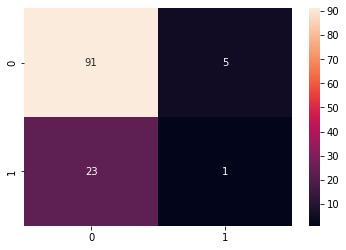

In [21]:
confusion_matrix_test=confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_test,annot=True)

In [22]:
auc_test= roc_auc_score(y_test, y_pred_test)
print('auc value for test data',auc_test)

auc value for test data 0.4947916666666667


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid_model=GridSearchCV(estimator = rf_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4],
                                                        'n_estimators' : [20,50,70,100,150]})

In [27]:
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [20, 50, 70, 100, 150]})

In [28]:
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.79375


In [29]:
rf_model_tweak=RandomForestClassifier( n_estimators=150,min_samples_split=6,max_depth=10,min_samples_leaf=1).fit(x_train,y_train)

In [30]:
y_pred_test_tweak=rf_model_tweak.predict(x_test)

In [31]:
print(classification_report(y_test,y_pred_test_tweak))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88        96
           1       0.00      0.00      0.00        24

    accuracy                           0.79       120
   macro avg       0.40      0.49      0.44       120
weighted avg       0.64      0.79      0.71       120



In [32]:
print(accuracy_score(y_test,y_pred_test_tweak))

0.7916666666666666


In [33]:
auc_test= roc_auc_score(y_test, y_pred_test_tweak)
print('auc value for test data',auc_test)

auc value for test data 0.4947916666666667


<AxesSubplot:>

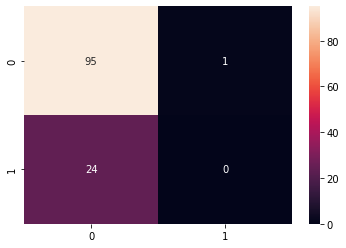

In [34]:
confusion_matrix_test=confusion_matrix(y_test,y_pred_test_tweak)
sns.heatmap(confusion_matrix_test,annot=True)